# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
pwd

'C:\\Users\\Aman Bhalla\\Documents\\Codig Ninja project'

# Loading pandas data frame using using panda library

In [3]:
df = pd.read_csv(r'C:\\Users\\Aman Bhalla\\Documents\\Codig Ninja project\\startup_funding.csv' , encoding ='utf-8')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Separating Investor from dataframe in to an new Dataframe and separating various investors separated by , in each row in the new dataframe

In [4]:
df['InvestorsName'].dropna(inplace=True)
# creatimg new Dataframe where  each colums have investor name for each row
arr = df['InvestorsName'].str.split(',',expand=True)
arr

,0,1,2,3,4,5,6,7,8,9
0,Kae Capital,None,None,None,None,None,None,None,None,None
1,Triton Investment Advisors,None,None,None,None,None,None,None,None,None
2,Kashyap Deorah,Anand Sankeshwar,Deepak Jain,Sadashiva NT,Arjun Mehta,Satish Kaul,Anindya Ghose,None,None,None
3,Kunal Shah,LetsVenture,Anupam Mittal,Hetal Sonpal,None,None,None,None,None,None
4,Narottam Thudi,Shireesh Palle,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2367,Asia Pacific Internet Group,None,None,None,None,None,None,None,None,None
2368,KARSEMVEN Fund,None,None,None,None,None,None,None,None,None
2369,Exfinity Fund,GrowX Ventures.,None,None,None,None,None,None,None,None
2370,MakeMyTrip,None,None,None,None,None,None,None,None,None


## Counting Frequncy of each investor 

In [5]:
l = []

# collecting the name of each investor for the newly created data frame and ignoring the None values, each entry of the datafram
# is stored in appended into a list

for i in range(len(arr)):
    for j in range(len(arr.columns)):
        if(type(arr.iloc[i,j])==str):
            l.append(arr.iloc[i,j].strip())
            
# creating a pandas dataframe from the list we generated containing investors name and genararting a pandas dataframe 
#from this list

df2 = pd.DataFrame(l)
df2.columns = ['Investors']

#dropping Nan values from the datframe

df2.dropna(inplace=True)
city = df2['Investors']
city1 = city.unique()

#Counting values the Frequency of each Investor
city2 = city.value_counts()[:5]
city2

Sequoia Capital         64
Accel Partners          53
Kalaari Capital         44
SAIF Partners           41
Indian Angel Network    40
Name: Investors, dtype: int64

In [6]:
#storing index in x
x = city2.index
# And Freq. of the investors in y
y=  city2.values
for i in range(len(x)):
    print(x[i],y[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


# Graph of Investor v/s the no. of times they invested

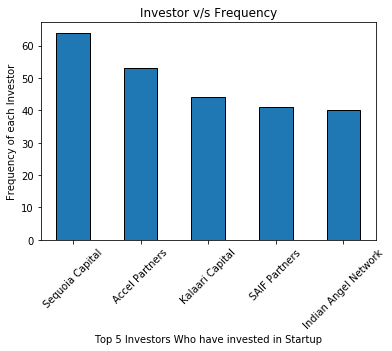

In [7]:
plt.bar(x,y,edgecolor ='black',width=0.5)
plt.xlabel('Top 5 Investors Who have invested in Startup')
plt.ylabel('Frequency of each Investor')
plt.xticks(rotation =45)
plt.title('Investor v/s Frequency')
plt.show()